In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

## MODIFIABLE PARAMETERS

In [6]:
WIN_PROBABILITY = 0.60      # Probability of being correct (In this simulation: that the odds will go down)
NUM_SIMULATIONS = 10000     # Number of Monte Carlo simulations
NUM_BETS = 10000            # Number of bets per simulation
INITIAL_BALANCE = 10000     # Initial balance in dollars
BET_RATIO = 0.05            # Size of each bet as a percentage of INITIAL_BALANCE
ODDS_CHANGE_RANGE = 0.1     # Odds increase or decrease range

## SIMULATION CODE

In [7]:
def run_simulation():
    balance = INITIAL_BALANCE
    balance_history = np.zeros(NUM_BETS + 1)
    balance_history[0] = balance
    
    for i in range(1, NUM_BETS + 1):
        initial_odds = 2.00
        is_right = random.random() < WIN_PROBABILITY
        
        if is_right:
            decrease_percent = random.uniform(0, ODDS_CHANGE_RANGE)
            new_odds = initial_odds * (1 - decrease_percent)
            
            true_win_prob = 1 / new_odds
            wins_bet = random.random() < true_win_prob
            
            if wins_bet:
                profit = (BET_RATIO * INITIAL_BALANCE) * (initial_odds - 1)
            else:
                profit = -(BET_RATIO * INITIAL_BALANCE)
            
        else:
            increase_percent = random.uniform(0, ODDS_CHANGE_RANGE)
            new_odds = initial_odds * (1 + increase_percent)
            
            hedge_stake = ((BET_RATIO * INITIAL_BALANCE) * initial_odds) / new_odds
            profit = -abs((BET_RATIO * INITIAL_BALANCE) - hedge_stake)
        
        balance += profit
        balance_history[i] = balance
        
        if balance <= 0:
            balance_history[i:] = 0
            break
    
    return balance_history


## BUILD SIMULATION

In [8]:
all_simulations = np.zeros((NUM_SIMULATIONS, NUM_BETS + 1))
final_balances = np.zeros(NUM_SIMULATIONS)

for sim_idx in tqdm(range(NUM_SIMULATIONS)):
    balance_history = run_simulation()
    all_simulations[sim_idx] = balance_history
    final_balances[sim_idx] = balance_history[-1]

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:40<00:00, 248.76it/s]


## STATS

### RESULTS

In [9]:
avg_final_balance = np.mean(final_balances)
median_final_balance = np.median(final_balances)
std_final_balance = np.std(final_balances)
win_rate = np.mean(final_balances > INITIAL_BALANCE) * 100
bankruptcy_rate = np.mean(final_balances <= 0) * 100

print(f"Average Final Balance: ${avg_final_balance:,.2f}")
print(f"Median Final Balance: ${median_final_balance:,.2f}")
print(f"Standard Deviation: ${std_final_balance:,.2f}")
print(f"Win Rate: {win_rate:,.1f}%")
print(f"Bankruptcy Rate: {bankruptcy_rate:,.1f}%")
print(f"Best Result: ${np.max(final_balances):,.2f}")
print(f"Worst Result: ${np.min(final_balances):,.2f}")

Average Final Balance: $53,730.82
Median Final Balance: $55,532.94
Standard Deviation: $51,134.39
Win Rate: 60.0%
Bankruptcy Rate: 39.9%
Best Result: $226,362.15
Worst Result: $0.00


### TRAJECTORIES

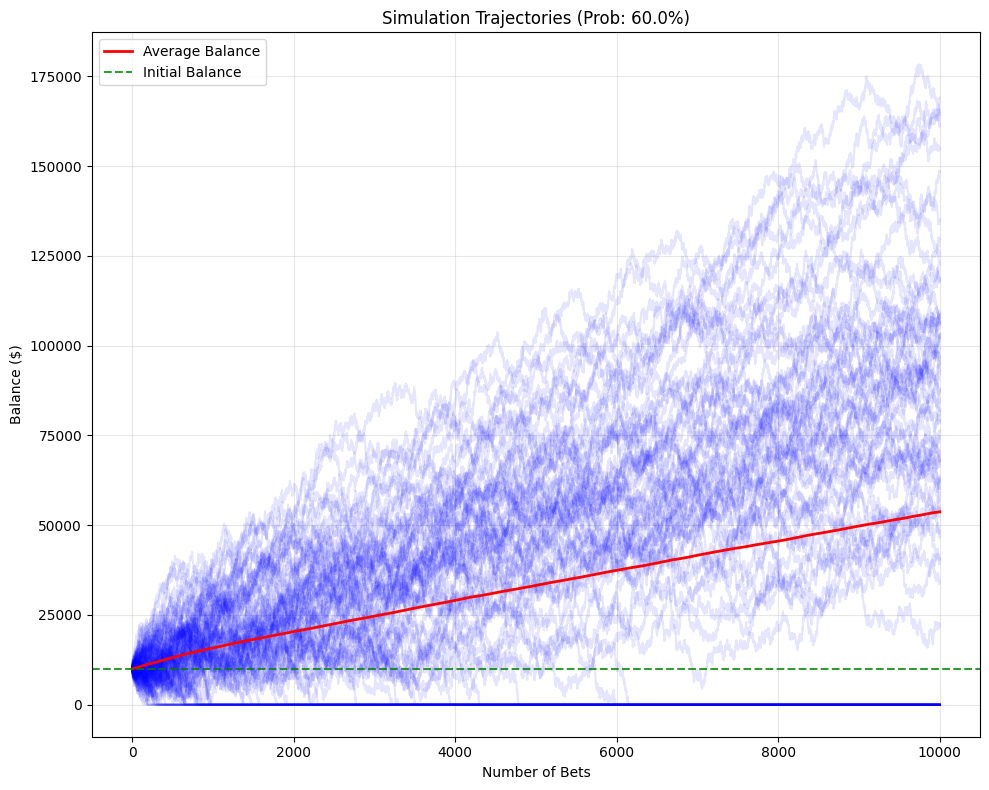

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

num_sample_paths = min(100, NUM_SIMULATIONS)
sample_indices = np.random.choice(NUM_SIMULATIONS, num_sample_paths, replace=False)

for idx in sample_indices:
    ax.plot(all_simulations[idx], alpha=0.1, color='blue')

avg_path = np.mean(all_simulations, axis=0)
ax.plot(avg_path, color='red', linewidth=2, label='Average Balance')
ax.axhline(y=INITIAL_BALANCE, color='green', linestyle='--', alpha=0.8, label='Initial Balance')
ax.set_xlabel('Number of Bets')
ax.set_ylabel('Balance ($)')
ax.set_title(f'Simulation Trajectories (Prob: {WIN_PROBABILITY*100}%)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### FINAL BALANCES DISTRIBUTION

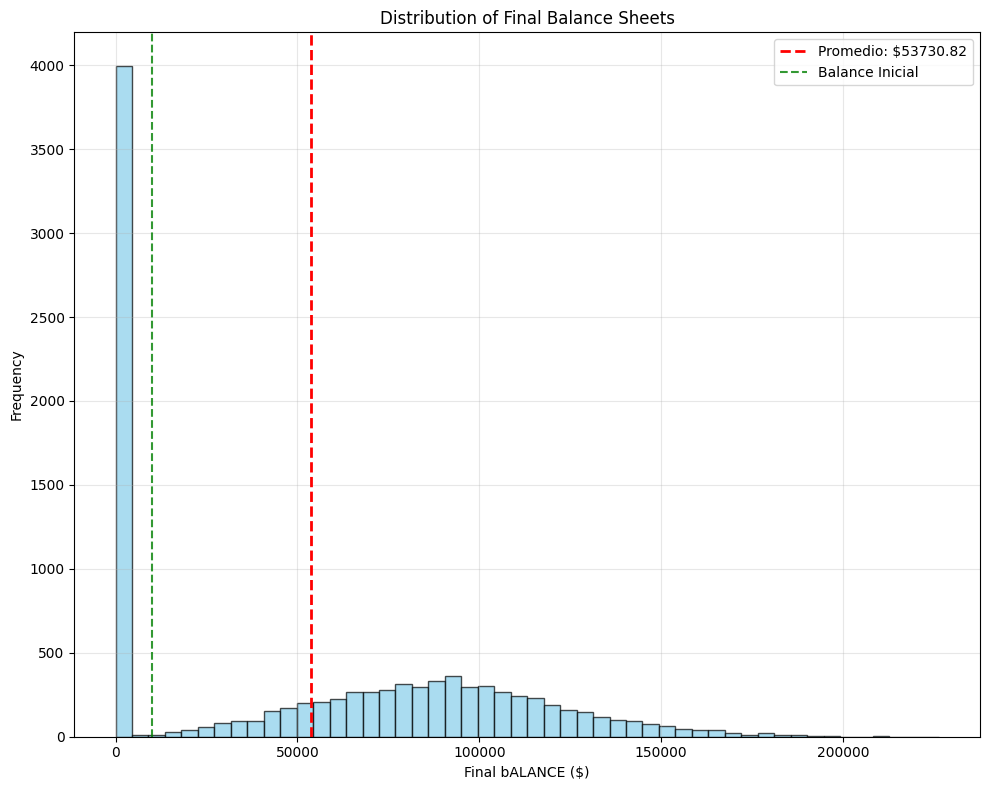

In [11]:
plt.figure(figsize=(10, 8))
plt.hist(final_balances, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=avg_final_balance, color='red', linestyle='--', linewidth=2, label=f'Promedio: ${avg_final_balance:.2f}')
plt.axvline(x=INITIAL_BALANCE, color='green', linestyle='--', alpha=0.8, label='Balance Inicial')
plt.xlabel('Final bALANCE ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Final Balance Sheets')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### PERCENTILES

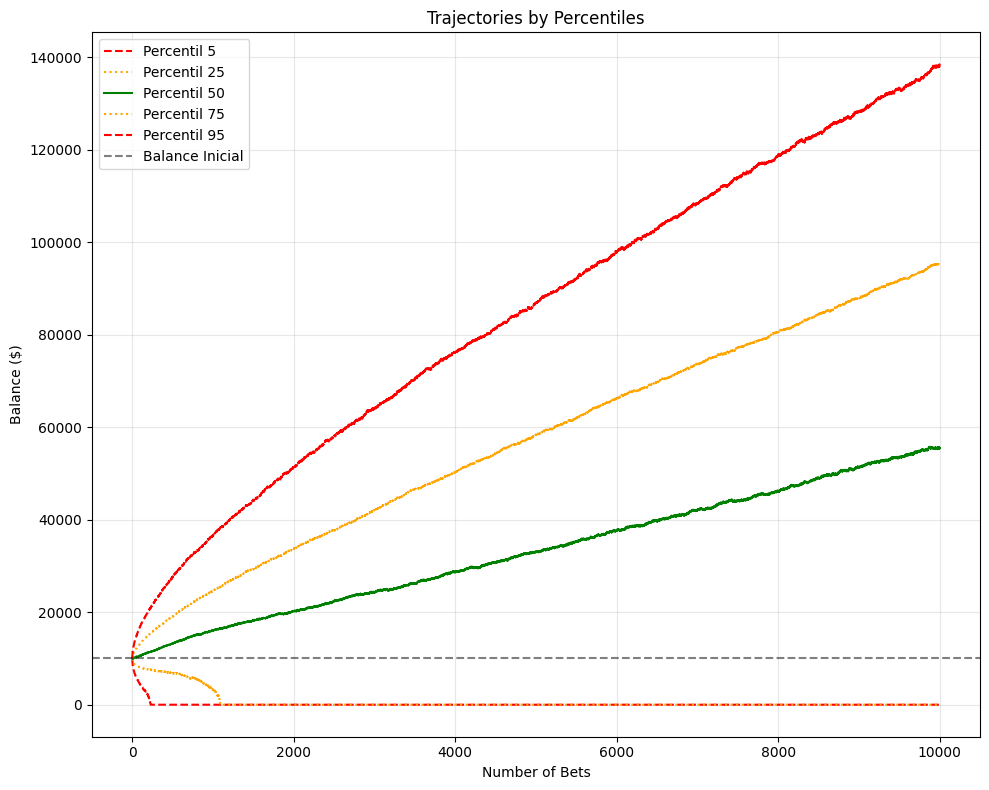

In [12]:
plt.figure(figsize=(10, 8))
percentiles = [5, 25, 50, 75, 95]
colors = ['red', 'orange', 'green', 'orange', 'red']
linestyles = ['--', ':', '-', ':', '--']

for i, percentile in enumerate(percentiles):
    percentile_path = np.percentile(all_simulations, percentile, axis=0)
    plt.plot(percentile_path, color=colors[i], linestyle=linestyles[i], 
             label=f'Percentil {percentile}')

plt.axhline(y=INITIAL_BALANCE, color='black', linestyle='--', alpha=0.5, label='Balance Inicial')
plt.xlabel('Number of Bets')
plt.ylabel('Balance ($)')
plt.title('Trajectories by Percentiles')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### CUMULATIVE DISTRIBUTION

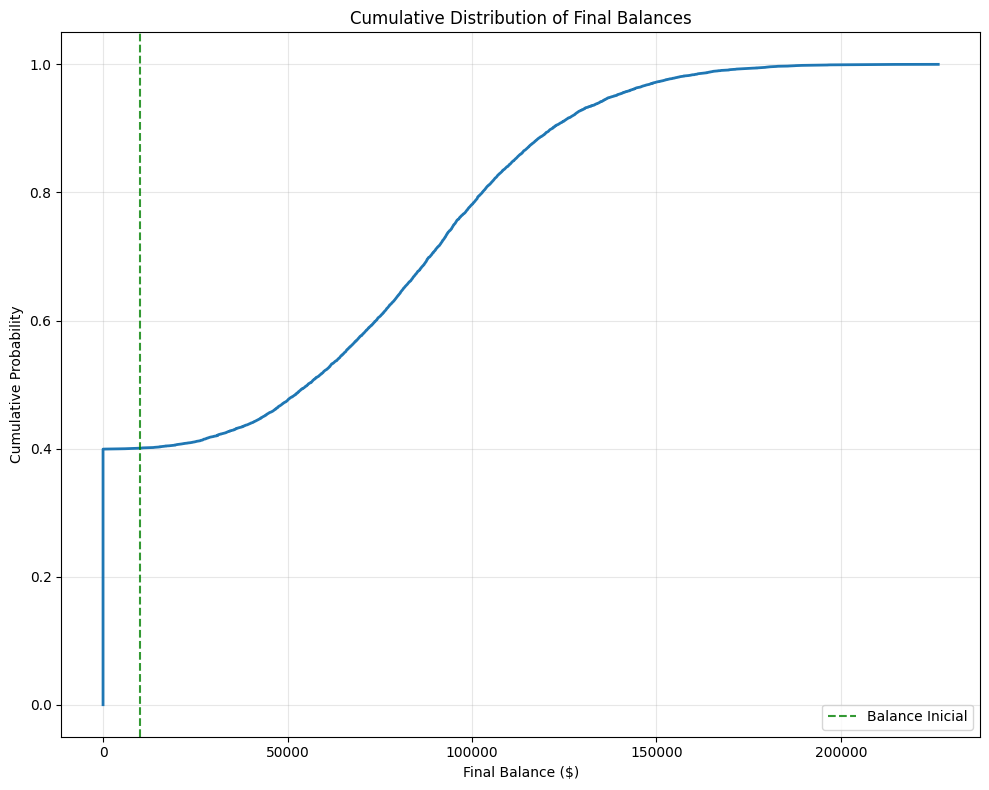

In [13]:
plt.figure(figsize=(10, 8))
sorted_balances = np.sort(final_balances)
cdf = np.arange(1, len(sorted_balances) + 1) / len(sorted_balances)
plt.plot(sorted_balances, cdf, linewidth=2)
plt.axvline(x=INITIAL_BALANCE, color='green', linestyle='--', alpha=0.8, label='Balance Inicial')
plt.xlabel('Final Balance ($)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Final Balances')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()